Choose a non-structural protein of SARS-CoV-2 (e.g., NSP3, NSP5, or NSP12) In a Jupyter notebook, write a Python script to retrieve the amino acid sequence of the selected protein from UniProtKB programmatically using their API. Calculate and display the amino  acid composition of the selected protein.

In [1]:
#In this cell, we are installing the libraries that we will need for the first question.
!pip install requests
import requests
from collections import Counter #we defined collections and Counter library; Counter give us count of the sequence

We have identified NSP3 as the protein. When we searched for the relevant protein in the UniProt database, we found a protein with the ID "P0DTD1". To ensure its accuracy, we examined its details, such as its association with any diseases and the organism it belongs to. Verification is important as we will use this ID in the next step.

In [2]:
uniprot_api = "https://www.uniprot.org/uniprot/"  #We define the UniProt website URL.
prt_accession_id = "P0DTD1"  #NSP3 non-structural protein ID in UniProt Database
response = requests.get(f"{uniprot_api}{prt_accession_id}.fasta")  
#An HTTP request is made to retrieve the FASTA-formatted sequence of the specified protein using the UniProt URL (uniprot_api) and the protein accession ID (prt_accession_id).

In the next cell, the success of the HTTP request is checked (response.status_code == 200). If successful, the processing of the protein's data in FASTA format continues.

Creating Amino Acid Sequence: The data in FASTA format is split line by line (data = response.text.split("\n")) to create a list named 'data.'
The first line usually contains header information, and the part from the second line onwards is concatenated (sequence = ''.join(data[1:])) to create a string named 'sequence.' This string contains the protein's amino acid sequence.

Counting Amino Acid Occurrences: Using the Counter class (aa_count = Counter(sequence)), the number of occurrences of each amino acid in the amino acid sequence is counted.

Displaying Amino Acid Sequence: The protein's accession ID (prt_accession_id) and the count of each amino acid are printed to the screen.

If the HTTP request is unsuccessful or insufficient, an error message is displayed.

In [3]:
if response.status_code == 200:  # Checks if the HTTP request was successfully completed. If successful, continues processing the protein's data in FASTA format.
    # We create the amino acid sequence from the FASTA file.
    data = response.text.split("\n")  # Splits the data in FASTA format line by line and creates a list named 'data'.
    sequence = ''.join(data[1:])  # Concatenates the part of the data from the second line onwards in FASTA format, creating a string named 'sequence'. This contains the protein's amino acid sequence.

    # We calculate the count of amino acids.
    aa_count = Counter(sequence)  # Uses the Counter class to count the occurrences of each amino acid in the amino acid sequence.

    # We display the amino acid sequence.
    print(f"{prt_accession_id}:")
    for amino_acid, count in aa_count.items():
        print(f"{amino_acid}: {count}")  # Prints the counts of amino acids in the sequence to the screen.

else:  # If the HTTP request is unsuccessful or insufficient, prints an error message.
    print(f"{prt_accession_id}: Data couldn't be retrieved. Status Code: {response.status_code}")


P0DTD1:
M: 168
E: 340
S: 456
L: 668
V: 598
P: 274
G: 412
F: 349
N: 384
K: 434
T: 527
H: 145
Q: 239
R: 244
D: 389
A: 487
C: 226
Y: 335
I: 343
W: 78


Question 2: Use the NCBI Entrez API to programmatically retrieve the nucleotide sequence of the gene encoding the selected protein. In your Jupyter notebook, write a script to fetch this data and display the nucleotide sequence.

In [4]:
#In this cell, we are installing the libraries that we will need for the second question.
!pip install biopython
from Bio import Entrez

In this stage, the goal is to retrieve the nucleotide sequence of the gene with the ID "NC_045512.2" from the NCBI Entrez database.

Identifying the Gene ID: The gene_id variable has been assigned.

Specifying the Email Address: An email address has been provided.

Fetching the Genomic Record: A request is made to the NCBI Entrez API using the Entrez.efetch function to retrieve the data of a specific nucleotide gene.

Reading the Genomic Record: The obtained GenBank-formatted data (genbank_record) is read, and only the nucleotide sequence is extracted. The nucleotide sequence is constructed by reading from the lines under the "ORIGIN" tag, skipping empty lines, and cleaning unnecessary spaces.

In the final stage, the nucleotide sequence is printed to the screen.

In [5]:
#The NCBI Entrez accession number for the gene is assigned to the gene_id variable
gene_id = "NC_045512.2"  # or gene_id_or_name = "NSP3"  # A specific gene's NCBI Entrez accession number is assigned to the gene_id variable

#An email address is specified for the owner of requests sent to the NCBI Entrez API
Entrez.email = "gulnuruzun20@gmail.com"  # This is the email address that will be used as the owner of requests sent to the NCBI Entrez API. It is important for NCBI authorities to contact you in case of excessive usage.

# The nucleotide sequence of the gene is retrieved
handle = Entrez.efetch(db="nucleotide", id=gene_id, rettype="gb", retmode="text")  # An NCBI Entrez API request is made using the Entrez.efetch function to retrieve the data of a specific nucleotide gene. The parameters are as follows:
# db: Type of database (nucleotide)
# id: NCBI accession number of the gene
# rettype: Type of returned data (in GenBank format)
# retmode: Mode of returned data (in text format)

genbank_record = handle.read()

#Only the nucleotide sequence is extracted from the GenBank format data
nucleotide_sequence = ""
reading_sequence = False  # A flag to control the start of the nucleotide sequence

for line in genbank_record.split("\n"):
    if line.startswith("ORIGIN"):
        # The nucleotide sequence begins from the lines under the ORIGIN tag
        reading_sequence = True
    elif reading_sequence and line.strip():  # Skip empty lines at the end of the nucleotide sequence
        # Clear spaces in the line and add to the nucleotide sequence
        nucleotide_sequence += "".join(line.split()[1:])

#Print the obtained nucleotide sequence to the screen
print("Nucleotide Sequence of the Gene:")
print(nucleotide_sequence)

Nucleotide Sequence of the Gene:
attaaaggtttataccttcccaggtaacaaaccaaccaactttcgatctcttgtagatctgttctctaaacgaactttaaaatctgtgtggctgtcactcggctgcatgcttagtgcactcacgcagtataattaataactaattactgtcgttgacaggacacgagtaactcgtctatcttctgcaggctgcttacggtttcgtccgtgttgcagccgatcatcagcacatctaggtttcgtccgggtgtgaccgaaaggtaagatggagagccttgtccctggtttcaacgagaaaacacacgtccaactcagtttgcctgttttacaggttcgcgacgtgctcgtacgtggctttggagactccgtggaggaggtcttatcagaggcacgtcaacatcttaaagatggcacttgtggcttagtagaagttgaaaaaggcgttttgcctcaacttgaacagccctatgtgttcatcaaacgttcggatgctcgaactgcacctcatggtcatgttatggttgagctggtagcagaactcgaaggcattcagtacggtcgtagtggtgagacacttggtgtccttgtccctcatgtgggcgaaataccagtggcttaccgcaaggttcttcttcgtaagaacggtaataaaggagctggtggccatagttacggcgccgatctaaagtcatttgacttaggcgacgagcttggcactgatccttatgaagattttcaagaaaactggaacactaaacatagcagtggtgttacccgtgaactcatgcgtgagcttaacggaggggcatacactcgctatgtcgataacaacttctgtggccctgatggctaccctcttgagtgcattaaagaccttctagcacgtgctggtaaagcttcatgcactttgtccgaacaactggactttattgacactaagaggggtgtatactgctgccgtgaacat

Retrieve the 3D structure of the selected protein from the Protein Data Bank. Use Python libraries such as Biopython and Py3Dmol in your Jupyter notebook to analyze and visualize the protein’s 3D structure. Discuss any interesting structural features or domains you observe.

We downloaded 6W9C.pdb file. (https://www.rcsb.org/structure/6W9C)

In [6]:
#In this cell, we are installing the libraries that we will need for the third question.
!pip install biopython py3dmol
from Bio.PDB import PDBParser
import py3Dmol
from collections import Counter
import matplotlib.pyplot as plt
import requests



Chain for analyses A information:
Chain A, Residue ARG, Atom N: [-57.952  22.516 -10.608]
Chain A, Residue ARG, Atom CA: [-58.636  23.469  -9.686]
Chain A, Residue ARG, Atom C: [-57.628  23.966  -8.639]
Chain A, Residue ARG, Atom O: [-57.186  23.14   -7.82 ]
Chain A, Residue ARG, Atom CB: [-59.849  22.793  -9.039]
Chain A, Residue ARG, Atom CG: [-61.007  23.752  -8.802]
Chain A, Residue ARG, Atom CD: [-62.183  23.1    -8.115]
Chain A, Residue ARG, Atom NE: [-62.138  23.248  -6.663]
Chain A, Residue ARG, Atom CZ: [-61.689  22.333  -5.802]
Chain A, Residue ARG, Atom NH1: [-61.208  21.176  -6.232]
Chain A, Residue ARG, Atom NH2: [-61.712  22.584  -4.501]
Chain A, Residue THR, Atom N: [-57.299  25.268  -8.661]
Chain A, Residue THR, Atom CA: [-56.223  25.918  -7.856]
Chain A, Residue THR, Atom C: [-56.821  26.941  -6.87 ]
Chain A, Residue THR, Atom O: [-57.899  27.49   -7.174]
Chain A, Residue THR, Atom CB: [-55.192  26.579  -8.784]
Chain A, Residue THR, Atom OG1: [-55.76   27.761  -9.35 ]

Chain A, Residue TYR, Atom CZ: [-37.104  33.934  10.144]
Chain A, Residue TYR, Atom OH: [-38.432  33.642  10.046]
Chain A, Residue HIS, Atom N: [-30.416  37.146  10.442]
Chain A, Residue HIS, Atom CA: [-28.959  37.405  10.63 ]
Chain A, Residue HIS, Atom C: [-28.209  36.074  10.744]
Chain A, Residue HIS, Atom O: [-27.304  35.971  11.6  ]
Chain A, Residue HIS, Atom CB: [-28.702  38.298  11.851]
Chain A, Residue HIS, Atom CG: [-29.01   39.738  11.615]
Chain A, Residue HIS, Atom ND1: [-28.551  40.736  12.451]
Chain A, Residue HIS, Atom CD2: [-29.726  40.353  10.649]
Chain A, Residue HIS, Atom CE1: [-28.967  41.9    12.001]
Chain A, Residue HIS, Atom NE2: [-29.69   41.691  10.897]
Chain A, Residue THR, Atom N: [-28.594  35.089   9.928]
Chain A, Residue THR, Atom CA: [-27.97   33.74    9.881]
Chain A, Residue THR, Atom C: [-28.123  33.135   8.481]
Chain A, Residue THR, Atom O: [-29.158  33.362   7.838]
Chain A, Residue THR, Atom CB: [-28.553  32.82   10.958]
Chain A, Residue THR, Atom OG1: [

Chain A, Residue ALA, Atom CA: [-27.66   41.719  21.501]
Chain A, Residue ALA, Atom C: [-26.633  42.753  21.051]
Chain A, Residue ALA, Atom O: [-25.534  42.353  20.694]
Chain A, Residue ALA, Atom CB: [-27.638  41.546  22.998]
Chain A, Residue ASN, Atom N: [-27.003  44.03   21.03 ]
Chain A, Residue ASN, Atom CA: [-26.072  45.154  20.751]
Chain A, Residue ASN, Atom C: [-25.457  45.552  22.093]
Chain A, Residue ASN, Atom O: [-26.069  46.353  22.821]
Chain A, Residue ASN, Atom CB: [-26.774  46.31   20.035]
Chain A, Residue ASN, Atom CG: [-25.854  47.471  19.737]
Chain A, Residue ASN, Atom OD1: [-24.65   47.394  19.968]
Chain A, Residue ASN, Atom ND2: [-26.419  48.558  19.239]
Chain A, Residue LEU, Atom N: [-24.299  44.975  22.41 ]
Chain A, Residue LEU, Atom CA: [-23.56   45.211  23.677]
Chain A, Residue LEU, Atom C: [-22.179  45.795  23.373]
Chain A, Residue LEU, Atom O: [-21.354  45.801  24.283]
Chain A, Residue LEU, Atom CB: [-23.454  43.88   24.428]
Chain A, Residue LEU, Atom CG: [-24.7

Chain A, Residue VAL, Atom CG1: [-27.758  38.333  41.862]
Chain A, Residue VAL, Atom CG2: [-27.139  35.93   42.07 ]
Chain A, Residue PHE, Atom N: [-28.357  38.83   38.474]
Chain A, Residue PHE, Atom CA: [-28.294  40.03   37.605]
Chain A, Residue PHE, Atom C: [-28.345  41.268  38.505]
Chain A, Residue PHE, Atom O: [-29.104  41.268  39.488]
Chain A, Residue PHE, Atom CB: [-29.402  39.977  36.553]
Chain A, Residue PHE, Atom CG: [-29.308  38.786  35.632]
Chain A, Residue PHE, Atom CD1: [-28.835  38.918  34.338]
Chain A, Residue PHE, Atom CD2: [-29.668  37.52   36.067]
Chain A, Residue PHE, Atom CE1: [-28.743  37.818  33.497]
Chain A, Residue PHE, Atom CE2: [-29.56   36.417  35.232]
Chain A, Residue PHE, Atom CZ: [-29.105  36.569  33.944]
Chain A, Residue TYR, Atom N: [-27.496  42.257  38.216]
Chain A, Residue TYR, Atom CA: [-27.375  43.534  38.965]
Chain A, Residue TYR, Atom C: [-27.484  44.698  37.982]
Chain A, Residue TYR, Atom O: [-26.914  44.577  36.88 ]
Chain A, Residue TYR, Atom CB: 

Chain B, Residue GLN, Atom CD: [-10.345   1.068  36.397]
Chain B, Residue GLN, Atom OE1: [-10.198   0.511  37.474]
Chain B, Residue GLN, Atom NE2: [-11.251   2.014  36.218]
Chain B, Residue ILE, Atom N: [-9.639 -3.154 32.225]
Chain B, Residue ILE, Atom CA: [-9.857 -4.599 31.918]
Chain B, Residue ILE, Atom C: [-9.226 -4.892 30.553]
Chain B, Residue ILE, Atom O: [-9.375 -4.052 29.645]
Chain B, Residue ILE, Atom CB: [-11.355  -4.984  31.96 ]
Chain B, Residue ILE, Atom CG1: [-12.214  -4.14   31.016]
Chain B, Residue ILE, Atom CG2: [-11.905  -4.938  33.377]
Chain B, Residue ILE, Atom CD1: [-13.459  -4.837  30.577]
Chain B, Residue GLU, Atom N: [-8.546 -6.038 30.437]
Chain B, Residue GLU, Atom CA: [-7.767 -6.454 29.236]
Chain B, Residue GLU, Atom C: [-8.784 -6.844 28.157]
Chain B, Residue GLU, Atom O: [-9.604 -7.735 28.435]
Chain B, Residue GLU, Atom CB: [-6.81  -7.611 29.578]
Chain B, Residue GLU, Atom CG: [-5.358 -7.373 29.169]
Chain B, Residue GLU, Atom CD: [-4.364 -7.037 30.291]
Chain B,

Chain B, Residue CYS, Atom CA: [-15.299   7.224  43.517]
Chain B, Residue CYS, Atom C: [-15.204   8.301  42.433]
Chain B, Residue CYS, Atom O: [-15.058   9.484  42.779]
Chain B, Residue CYS, Atom CB: [-16.405   7.556  44.506]
Chain B, Residue CYS, Atom SG: [-18.031   7.734  43.719]
Chain B, Residue ILE, Atom N: [-15.251   7.895  41.168]
Chain B, Residue ILE, Atom CA: [-15.263   8.818  40.   ]
Chain B, Residue ILE, Atom C: [-16.727   9.067  39.613]
Chain B, Residue ILE, Atom O: [-17.411   8.123  39.155]
Chain B, Residue ILE, Atom CB: [-14.437   8.244  38.836]
Chain B, Residue ILE, Atom CG1: [-12.991   7.975  39.27 ]
Chain B, Residue ILE, Atom CG2: [-14.517   9.158  37.618]
Chain B, Residue ILE, Atom CD1: [-12.084   7.482  38.163]
Chain B, Residue ASP, Atom N: [-17.173  10.308  39.795]
Chain B, Residue ASP, Atom CA: [-18.505  10.812  39.391]
Chain B, Residue ASP, Atom C: [-18.305  11.834  38.273]
Chain B, Residue ASP, Atom O: [-18.468  13.03   38.547]
Chain B, Residue ASP, Atom CB: [-19.

Chain C, Residue LEU, Atom CD2: [-61.673   2.907  25.254]
Chain C, Residue LYS, Atom N: [-65.011   0.582  23.161]
Chain C, Residue LYS, Atom CA: [-6.4891e+01  6.4000e-02  2.1775e+01]
Chain C, Residue LYS, Atom C: [-64.26    1.14   20.886]
Chain C, Residue LYS, Atom O: [-64.866   2.216  20.743]
Chain C, Residue LYS, Atom CB: [-66.273  -0.328  21.249]
Chain C, Residue LYS, Atom CG: [-66.415  -0.4    19.733]
Chain C, Residue LYS, Atom CD: [-67.778  -0.925  19.303]
Chain C, Residue LYS, Atom CE: [-67.854  -1.293  17.833]
Chain C, Residue LYS, Atom NZ: [-69.255  -1.524  17.39 ]
Chain C, Residue PHE, Atom N: [-63.109   0.84   20.283]
Chain C, Residue PHE, Atom CA: [-62.402   1.754  19.348]
Chain C, Residue PHE, Atom C: [-63.074   1.706  17.976]
Chain C, Residue PHE, Atom O: [-63.487   0.62   17.532]
Chain C, Residue PHE, Atom CB: [-60.907   1.426  19.29 ]
Chain C, Residue PHE, Atom CG: [-60.193   1.808  20.557]
Chain C, Residue PHE, Atom CD1: [-60.075   3.14   20.91 ]
Chain C, Residue PHE, A

Chain C, Residue CYS, Atom N: [-39.133  14.553  36.626]
Chain C, Residue CYS, Atom CA: [-38.814  13.489  37.615]
Chain C, Residue CYS, Atom C: [-40.106  12.791  38.055]
Chain C, Residue CYS, Atom O: [-40.089  12.109  39.088]
Chain C, Residue CYS, Atom CB: [-38.102  14.078  38.832]
Chain C, Residue CYS, Atom SG: [-36.414  14.569  38.548]
Chain C, Residue GLY, Atom N: [-41.189  12.964  37.291]
Chain C, Residue GLY, Atom CA: [-42.533  12.457  37.618]
Chain C, Residue GLY, Atom C: [-42.687  10.981  37.304]
Chain C, Residue GLY, Atom O: [-42.22   10.541  36.239]
Chain C, Residue HIS, Atom N: [-43.346  10.236  38.189]
Chain C, Residue HIS, Atom CA: [-43.626   8.787  38.009]
Chain C, Residue HIS, Atom C: [-45.105   8.478  38.266]
Chain C, Residue HIS, Atom O: [-45.608   8.867  39.343]
Chain C, Residue HIS, Atom CB: [-42.705   7.965  38.914]
Chain C, Residue HIS, Atom CG: [-42.801   6.502  38.666]
Chain C, Residue HIS, Atom ND1: [-42.682   5.964  37.391]
Chain C, Residue HIS, Atom CD2: [-43.01

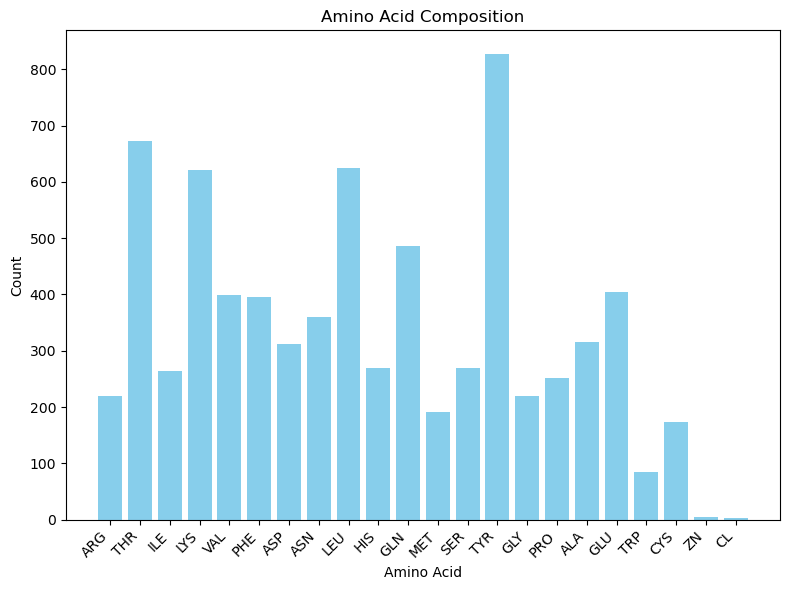

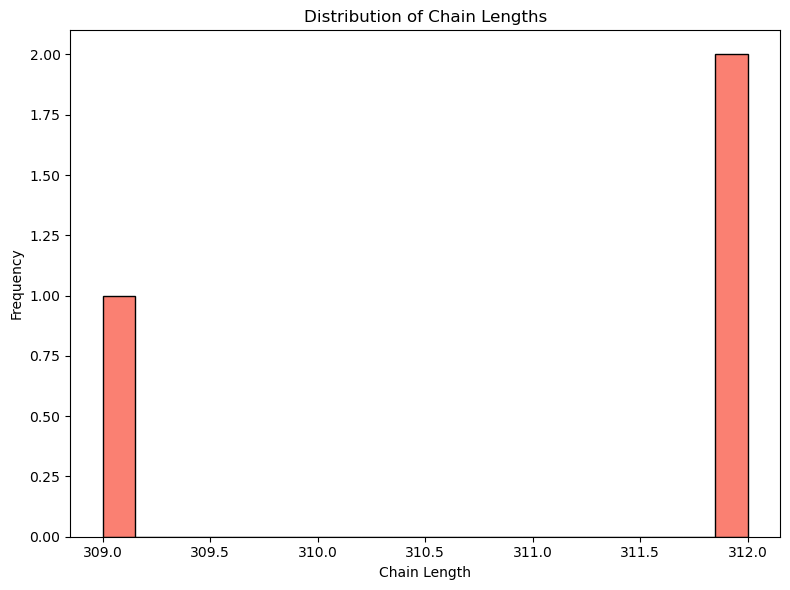

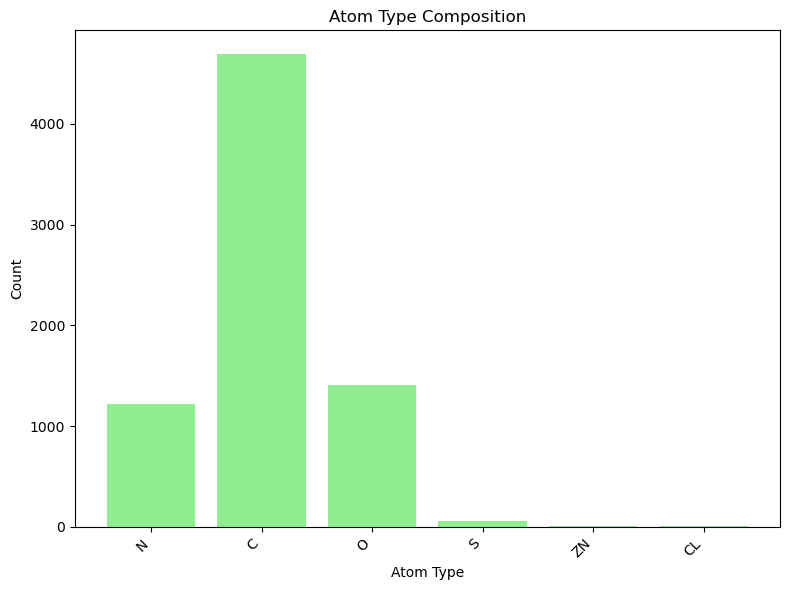

In [7]:
#Downloaded .pdb file.
pdb_file = "ourpath"
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

#Obtaining chain information to be used in subsequent analyses.
amino_acids = []
chain_lengths = []
atom_types = []

for model in structure:
    for chain in model:
        chain_id = chain.get_id()
        print(f"\nChain for analyses {chain_id} information:")

        #We are obtaining chain information.
        for residue in chain:
            for atom in residue:
                #We are obtaining atom information.
                atom_name = atom.get_name()
                residue_name = residue.get_resname()
                atom_coordinates = atom.get_coord()
                print(f"Chain {chain_id}, Residue {residue_name}, Atom {atom_name}: {atom_coordinates}")

                #We are creating the list of amino acids.
                amino_acids.append(residue_name)

        # We are calculate the chain length.
        chain_length = len(list(chain))
        print(f"Zincir {chain_id} Uzunluğu: {chain_length}")
        chain_lengths.append(chain_length)

        #We are add atom types to the list
        for residue in chain:
            for atom in residue:
                atom_types.append(atom.element)

#Visualization stage of analysis results.

#Amino acid composition analysis (Bar plot)
amino_acid_counts = Counter(amino_acids)
plt.figure(figsize=(8, 6))
plt.bar(amino_acid_counts.keys(), amino_acid_counts.values(), color='skyblue')
plt.xlabel('Amino Acid')
plt.ylabel('Count')
plt.title('Amino Acid Composition')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Chain length analysis (Histogram)
plt.figure(figsize=(8, 6))
plt.hist(chain_lengths, bins=20, edgecolor='black', color='salmon')
plt.xlabel('Chain Length')
plt.ylabel('Frequency')
plt.title('Distribution of Chain Lengths')
plt.tight_layout()
plt.show()

#Atom type analysis (Bar plot)
plt.figure(figsize=(8, 6))
atom_type_counts = Counter(atom_types)
plt.bar(atom_type_counts.keys(), atom_type_counts.values(), color='lightgreen')
plt.xlabel('Atom Type')
plt.ylabel('Count')
plt.title('Atom Type Composition')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


According to the analysis results:

1- Amino Acid Composition Graph: The numbers in the graph, TYR(800), ZN(0), and CL(0), draw attention. This indicates the TYR Richness of the protein. A protein containing 800 TYR suggests that TYR may play a crucial role in the stability, folding, or function of the protein. Since TYR contains functional groups in proteins, it can be considered that this protein may be involved in specific biological processes. Given that the protein is already known to be associated with SARS-CoV-2, this result is expected.

2- Chain Length Graph:

Lengths of Chains A, B, and C: Chains A and C consist of 312 amino acids each, while chain B consists of 309 amino acids. The histogram graph shows the frequency of each chain length.

Different Chain Lengths and Function: Different chain lengths may suggest that the protein has different functional or structural features. For example, in some proteins, the length of a specific chain can have a critical effect on its function.

Chain Length and Tertiary Structure: The three-dimensional structures of proteins can be associated with chain lengths. Variations in chain length can affect the three-dimensional folding of the protein.

3- Atomic Species Analysis Graph:

More than 4000 C (Carbon) atoms indicate that the protein is rich in carbon.
Around 1200 N (Nitrogen) atoms suggest that the protein contains nitrogen-containing amino acids.
Approximately 1450 O (Oxygen) atoms imply the presence of oxygen-containing functional groups in the protein.
Around 100 S (Sulfur) atoms indicate that the protein contains sulfur-containing amino acids.

Absence of ZN (Zinc) and CL (Chlorine): The absence of ZN and CL, both being zero, indicates that the protein does not interact specifically with these ions. This implies that the protein may perform a specific biological role without interacting with zinc or chlorine.

Visualization Step

At this stage, the aim is to create a 3D molecular viewer using the py3Dmol library and add the 6W9C.pdb file to the viewer.

Creating Py3Dmol Viewer: The expression py3Dmol.view(width=400, height=400) creates a py3Dmol viewer with dimensions of 400x400 pixels and assigns this viewer to the variable viewer.

Adding PDB Structure to the Viewer: The expression open(pdb_file, "r").read() reads the specified PDB file, and the expression viewer.addModel(pdb_data, "pdb") adds the read PDB data (in "pdb" format) to the viewer.

Displaying the 3D Image: The expressions viewer.zoomTo() and viewer.show() are used to focus and display the added PDB structure in the viewer.

This code block is intended to create a 3D molecular viewer using the py3Dmol library and visualize the content of the 6W9C.pdb file within this viewer.

In [8]:
#Create a Py3Dmol viewer
viewer = py3Dmol.view(width=400, height=400)

#Load the PDB structure and add it to the viewer
pdb_data = open(pdb_file, "r").read()
viewer.addModel(pdb_data, "pdb")

#Show the 3D visualization
viewer.zoomTo()
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [9]:
#Additionally, visualization to protein structure using different library like os and nglview.
#Visualization with NGLViews Library (optional)
!pip install nglview
import os
import nglview as nv

filepath = os.path.join("PDB_file", "6W9C.pdb")
view = nv.show_file("ourpath") #my path
view

NGLWidget()

4) Explore the function of the selected protein and identify any known variants and their associated functional impacts.Use your Jupyter notebook to visualize the locations of these variants on the protein’s 3D structure, if applicable.

Coronavirus nonstructural protein 3 (nsp3) is a multi-functional protein, playing a critical role in viral replication and in regulating host antiviral innate immunity. NSP3 an essential component of the replication/transcription complex, is one of the most important antiviral targets. Additionally, it houses proteinases responsible for cleaving the polyprotein. This variants have frequency missense feature.
Select the 20 variants for visualization.

This variants names and positions list: (Position, ENA ID)

10,   MN908947.3:293:G:C
121,  MN908947.3:626:G:T
179,  MN908947.3:801:G:T
272,  MN908947.3:1080:A:T
282,  MN908947.3:1109:A:G
831,  MN908947.3:2756:A:G
1005, MN908947.3:3279:T:C
1064, MN908947.3:3455:T:C
1115, MN908947.3:3608:C:T
1364, MN908947.3:4357:G:T
1440, MN908947.3:4584:A:G
2040, MN908947.3:6383:G:A
2347, MN908947.3:7306:G:T
2387, MN908947.3:7425:T:C
2691, MN908947.3:8337:G:T
2925, MN908947.3:9038:G:T
3162, MN908947.3:9750:A:G
3390, MN908947.3:10434:A:T
3746, MN908947.3:11502:G:T
4001, MN908947.3:12268:G:T

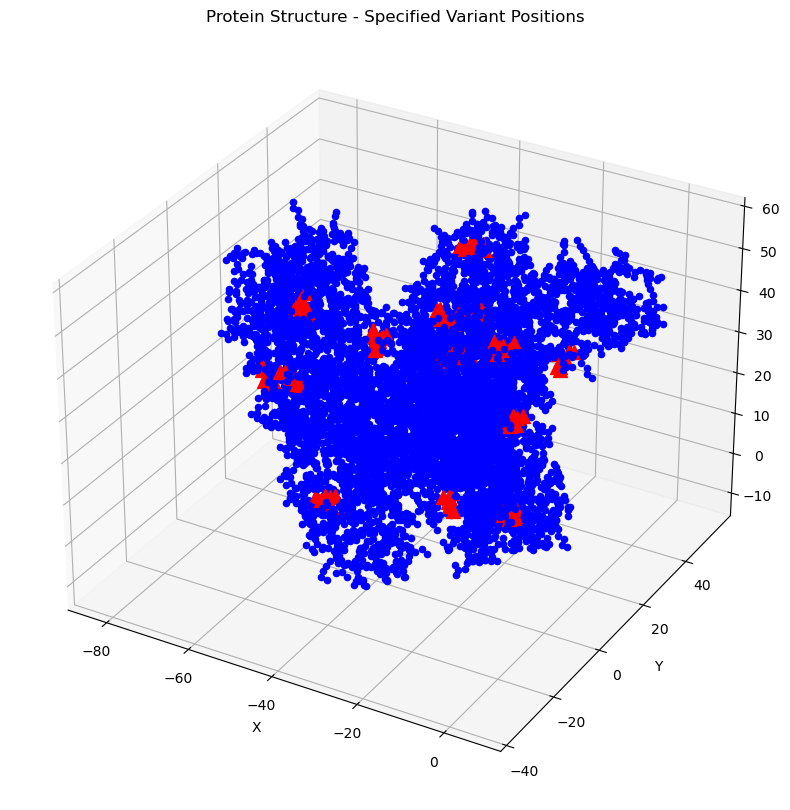

In [10]:
from Bio import PDB
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from Bio.PDB import PDBParser

# Downloaded .pdb file.
pdb_file = "C:/Users/gulnu/OneDrive/Desktop/BSB511-HW1/6W9C.pdb"
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

# Let's assume there is a variant at a specific amino acid position. UniProt shows 682 different variants.
# We will select 20 variants and visualize them by specifying their positions.
# Specified variant positions
variant_positions = [10, 121, 179, 272, 282, 831, 1005, 1064, 1115, 1364, 1440, 2040, 2347, 2387, 2691, 2925, 3162, 3390, 3746, 4001]

# Create a 3D plot for visualization
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each atom of the protein
for model in structure:
    for chain in model:
        for residue in chain:
            for atom in residue:
                ax.scatter(atom.coord[0], atom.coord[1], atom.coord[2], c='b', marker='o')

# Mark specified variant positions
for model in structure:
    for chain in model:
        for residue in chain:
            if residue.id[1] in variant_positions:
                for atom in residue:
                    ax.scatter(atom.coord[0], atom.coord[1], atom.coord[2], c='r', marker='^', s=100)

# Axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Protein Structure - Specified Variant Positions')
plt.show()

5) Conduct a literature review to find recent studies related to the selected protein, its function, and its role in the viral life cycle.Summarize your findings and discuss how the bioinformatics analysis you performed in the Jupyter notebook contributed to your understanding of the protein.

After conducting a literature review, I discovered that the selected protein has significant effects on the central nervous system, concurrently impacting numerous functions directly. Moreover, several drug discovery studies have been conducted by targeting this protein. In addition to complex and long-term investigations, publications predominantly emphasize analysis and visualization, forming the foundation for subsequent stages.

Some publications that caught my attention:
https://doi.org/10.1007/s42485-021-00067-w
https://doi.org/10.1101/2023.09.01.555899
https://doi.org/10.1016/j.compbiolchem.2023.107919
https://doi.org/10.20944/preprints202310.0052.v1
https://doi.org/10.1016/j.ygeno.2022.110466
https://www.medrxiv.org/content/10.1101/2022.01.28.22269990v3

